In [13]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import matplotlib.gridspec as gridspec
import time
import scipy.stats as st

In [107]:
# Modelo lineal
def straight_line(x, m, c):
    ''' A straight line model: y = m*x + c '''
    return m*x + c

In [108]:
m_true = 3.5 # gradient of the line
c_true = 1.2 # y-intercept of the line

In [109]:
L = 1. #Range of x-data
M = 50 # Number of data points
x = np.sort(L * np.random.rand(M)) # their x-coordinates
x

array([0.0075741 , 0.01225503, 0.04665136, 0.06388705, 0.06876861,
       0.07871678, 0.09793958, 0.10520544, 0.15577497, 0.15874889,
       0.16517612, 0.17891874, 0.18429344, 0.19937918, 0.23688605,
       0.25994189, 0.30928329, 0.33080295, 0.33563133, 0.38612585,
       0.41238347, 0.43257314, 0.46381856, 0.47650472, 0.47871383,
       0.49202005, 0.51560459, 0.53232287, 0.53521917, 0.56565263,
       0.59714938, 0.6018967 , 0.64583689, 0.6764889 , 0.70058614,
       0.7091431 , 0.76936075, 0.77986156, 0.78116547, 0.81318446,
       0.8325363 , 0.85745742, 0.86154257, 0.86193068, 0.8771817 ,
       0.89892693, 0.92130026, 0.93296011, 0.96884993, 0.99320272])

In [110]:
sigma = 0.5 # standard deviation of the noise
data = straight_line(x, m_true, c_true) + sigma * np.random.randn(M)


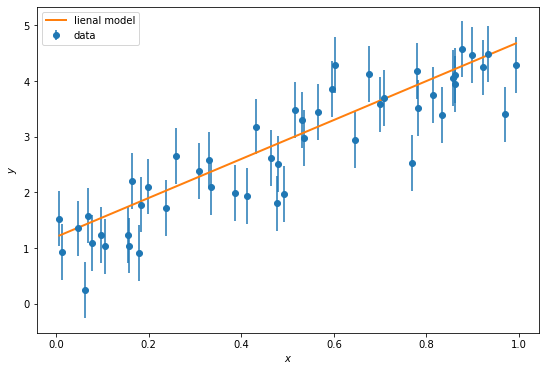

In [111]:
plt.figure(figsize=(9,6))
plt.errorbar(x, data, yerr=sigma, fmt="o", label='data')
plt.plot(x, straight_line(x, m_true, c_true), '-', lw=2, label='lienal model')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

In [201]:
def logprior(theta):
    ''' The natural logarithm of the prior probability. '''
    lp = 0.
    # unpack the model parameters from the tuple
    print(theta)
    m, c = theta

    # uniform prior on c
    

    cmin = -10. # lower range of prior
    cmax = 10.  # upper range of prior
    # set prior to 1 (log prior to 0) if in the range and zero (-inf) outside the range
    lp = 0. if cmin < c < cmax else -np.inf
    
     # uniform prior on m
    mmin = -15. # lower range of prior
    mmax = 15.  # upper range of prior
  
    # set prior to 1 (log prior to 0) if in the range and zero (-inf) outside the range
    lp += 0. if mmin < m < mmax else -np.inf
    
    return lp

In [199]:
def loglike(theta, data, sigma, x):
    '''The natural logarithm of the likelihood.'''
    # unpack the model parameters
    
    c,m = theta
    # evaluate the model
    lin_md = straight_line(x, m, c)
    # return the log likelihood
    return -0.5 * np.sum(((lin_md - data)/sigma)**2)


In [114]:
def logpost(theta, data, sigma, x):
    '''The natural logarithm of the posterior.'''
    return logprior(theta) + loglike(theta, data, sigma, x)

In [115]:
nwalkers = 10 # Number of walkers to use. It should be at least twice the number of dimensions.
nsteps = 5000 # Number of steps/iterations.
start = 0.01 * np.random.randn(nwalkers,2) # Initial positions of the walkers.
t0 = time.time()
samples = 0.01 * np.random.randn(len(x),2)
samples.T[0]

array([ 0.00776018, -0.00633619,  0.00561921, -0.00792184, -0.00064145,
       -0.00533425, -0.00197011, -0.00445881, -0.00890092,  0.01568299,
        0.00096295,  0.01253248,  0.00349031,  0.01190044, -0.00864237,
        0.00418199, -0.00099593,  0.00305199,  0.00888102, -0.0010076 ,
        0.00298386,  0.00677731, -0.01072382,  0.00588054, -0.00286804,
        0.00390417, -0.01342307, -0.00278606, -0.00502296, -0.00095114,
       -0.00789449,  0.00938299, -0.00572004, -0.01144653,  0.00087005,
       -0.0079769 , -0.01400555, -0.00766822,  0.00228827,  0.00225088,
        0.02055603, -0.00497409,  0.00093213, -0.00164872, -0.01225114,
       -0.0083288 ,  0.00570374, -0.03484892, -0.01220665, -0.00903406])

In [172]:
from scipy.stats import norm
def target(lik, prior, n, h, theta):
    if theta < 0 or theta > 1:
        return 0
    else:
        return loglike(thetaC, data, sigma, x)*st.norm(loc=x1, scale=1).pdf(x2)*prior.norm(theta)
def mh_coin(niters, n, h, theta, lik, prior, sigma):
    samples = [theta]
    while len(samples) < niters:
        theta_p = theta + st.norm(0, sigma).rvs()
        den = target(lik, prior, n, h, theta)
        rho = min(1, target(lik, prior, n, h, theta_p)/den if den !=0 else target(lik, prior, n, h, theta))
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
        samples.append(theta)
    return samples
n = 100
h = 61
thetaC = 0.01 * np.random.randn(1,1)[0][0],0.01 * np.random.randn(1,1)[0][0]

lik = loglike(thetaC, data, sigma, x)
a = 10
b = 10
prior = st.beta(a, b)
sigma = 0.05
niters = 100

sampless = [mh_coin(niters, n, h, theta, lik, prior, sigma) for theta in np.linspace(0,1,8)]



AttributeError: 'norm_gen' object has no attribute 'norm'

In [153]:
print(sampless)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.1111111111111111, 0.17906625813282856, 0.21640856241640974, 0.21640856241640974, 0.1916357431323893, 0.1916357431323893, 0.17728249632358467, 0.24081102267776383, 0.2686128699728447, 0.27314718215105654, 0.2734108158067094, 0.2734108158067094, 0.24543796300596107, 0.24543796300596107, 0.24543796300596107, 0.2738877542374895, 0.3261133350474231, 0.3261133350474231, 0.3557371770746841, 0.3620430355335254, 0.3774188924590935, 0.3613847611780241, 0.2580395167135127, 0.2580395167135127, 0.25803

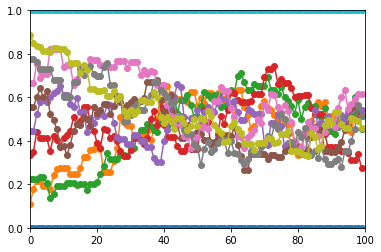

In [166]:
for samples in sampless:
    plt.plot(samples, '-o')
plt.xlim([0, niters])
plt.ylim([0, 1]);

In [234]:
def guassian_posterior(X, theta):
    # returns the unnormalized log posterior
    loglik = loglike(theta, X, sigma, x)
    logprior = np.log(st.norm(loc=0, scale=1).pdf(theta))
    
    return loglik + logprior
    
def guassian_proposal(theta_curr):
    # proposal based on Gaussian
    theta_new = st.norm(loc=theta_curr, scale=0.2).rvs()
    return theta_new

def guassian_proposal_prob(x1, x2):
    # calculate proposal probability q(x2|x1), based on Gaussian
    q = st.norm(loc=x1, scale=1).pdf(x2)
    return q

def mcmc_mh_posterior(X, theta_init,sigma,x, func, proposal_func, proposal_func_prob, n_iter=1000):
    # Metropolis-Hastings to estimate posterior
    thetas = []
    theta_curr = theta_init
    accept_rates = []
    accept_cum = 0
    
    for i in range(1, n_iter+1):
        print(i)
        theta_new = proposal_func(theta_curr)
        print('cur',theta_new)

        prob_curr = func(theta_curr,X,sigma,x)
        
        prob_new = func(theta_new,X,sigma,x)
        
        # we calculate the prob=exp(x) only when prob<1 so the exp(x) will not overflow for large x
        print('probCur',prob_curr)
        print('prob_new',prob_new)
        if prob_new > prob_curr:
            acceptance_ratio = 1,1
        else:
            qr = proposal_func_prob(theta_curr, theta_new)/proposal_func_prob(theta_curr, theta_new)
            
            acceptance_ratio = np.exp(prob_new - prob_curr) * qr
        print('accRatio1',acceptance_ratio)
        acceptance_prob = min(1, acceptance_ratio[0]),min(1, acceptance_ratio[1])
        
        if acceptance_prob[0] > st.uniform(0,1).rvs() and acceptance_prob[1] > st.uniform(0,1).rvs():
            theta_curr = theta_new
            accept_cum = accept_cum+1
            thetas.append(theta_new)
        else:
            thetas.append(theta_curr)
            
        accept_rates.append(accept_cum/i)
        
    return thetas, accept_rates


# generate observed data
X = data
# run MCMC
thetas, accept_rates = mcmc_mh_posterior(X, [1,1],sigma,x, 
                                         logpost, guassian_proposal, guassian_proposal_prob, 
                                         n_iter=1000)


1
cur [1.34368821 1.50072358]
[1, 1]
[1, 1]
[1.34368821 1.50072358]
[1.34368821 1.50072358]
probCur -23691.25671650675
prob_new -10510.170741040944
accRatio1 (1, 1)
2
cur [1.5153963  0.94136862]
[1.34368821 1.50072358]
[1.34368821 1.50072358]
[1.5153963  0.94136862]
[1.5153963  0.94136862]
probCur -10510.170741040944
prob_new -14262.73544486271
accRatio1 [0. 0.]
3
cur [1.27124645 1.59696403]
[1.34368821 1.50072358]
[1.34368821 1.50072358]
[1.27124645 1.59696403]
[1.27124645 1.59696403]
probCur -10510.170741040944
prob_new -10505.40929289471
accRatio1 (1, 1)
4
cur [1.2406996  1.42382777]
[1.27124645 1.59696403]
[1.27124645 1.59696403]
[1.2406996  1.42382777]
[1.2406996  1.42382777]
probCur -10505.40929289471
prob_new -12826.222170390813
accRatio1 [0. 0.]
5
cur [1.2614635  1.99031421]
[1.27124645 1.59696403]
[1.27124645 1.59696403]
[1.2614635  1.99031421]
[1.2614635  1.99031421]
probCur -10505.40929289471
prob_new -7139.696880125599
accRatio1 (1, 1)
6
cur [0.9159723 2.2191984]
[1.2614635

In [257]:
m_theta = []
c_theta = []
for i in range(len(thetas)):
    m_theta.append(thetas[i][0])
    c_theta.append(thetas[i][1])
chains = [m_theta,c_theta]
chains[1][:]

[1.5007235804970955,
 1.5007235804970955,
 1.5969640254043609,
 1.5969640254043609,
 1.9903142100948488,
 1.9903142100948488,
 2.006123993054512,
 2.0313487392890686,
 2.0050212887810375,
 2.0050212887810375,
 2.0050212887810375,
 2.0050212887810375,
 2.0050212887810375,
 2.213735279157428,
 2.213735279157428,
 2.4014694522997124,
 2.4014694522997124,
 2.50401812179999,
 2.50401812179999,
 2.50401812179999,
 2.50401812179999,
 2.50401812179999,
 3.004206192917179,
 3.1679322782131454,
 3.2763173982746485,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.4667974814014886,
 3.599303404402493,
 3.599303404402493,
 3.599303404402493,
 3.599303404402493,
 3.5993034

1.2614635022682095


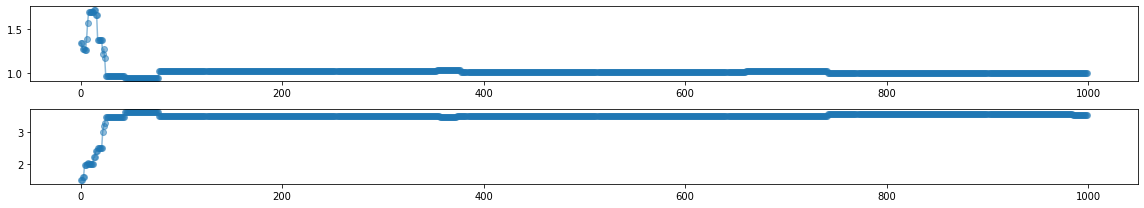

In [261]:

ndim = len(thetas[0])
print(thetas[5][0])
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(chains[n][:], '-o',alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn

sns.pairplot(penguins, kind="kde")